<a href="https://colab.research.google.com/github/SeanLi-OI/Earthquake-Statistics/blob/master/Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -qq install libgeos-dev
!pip install -qq https://github.com/matplotlib/basemap/archive/master.zip

Selecting previously unselected package libgeos-dev.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     | 195.7MB 461kB/s
     |████████████████████████████████| 10.9MB 7.6MB/s 
     |████████████████████████████████| 225kB 57.1MB/s 


In [25]:
!git clone https://github.com/SeanLi-OI/Earthquake-Statistics.git
!mv Earthquake-Statistics/*.csv .

fatal: destination path 'Earthquake-Statistics' already exists and is not an empty directory.
mv: cannot stat 'Earthquake-Statistics/*.csv': No such file or directory


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


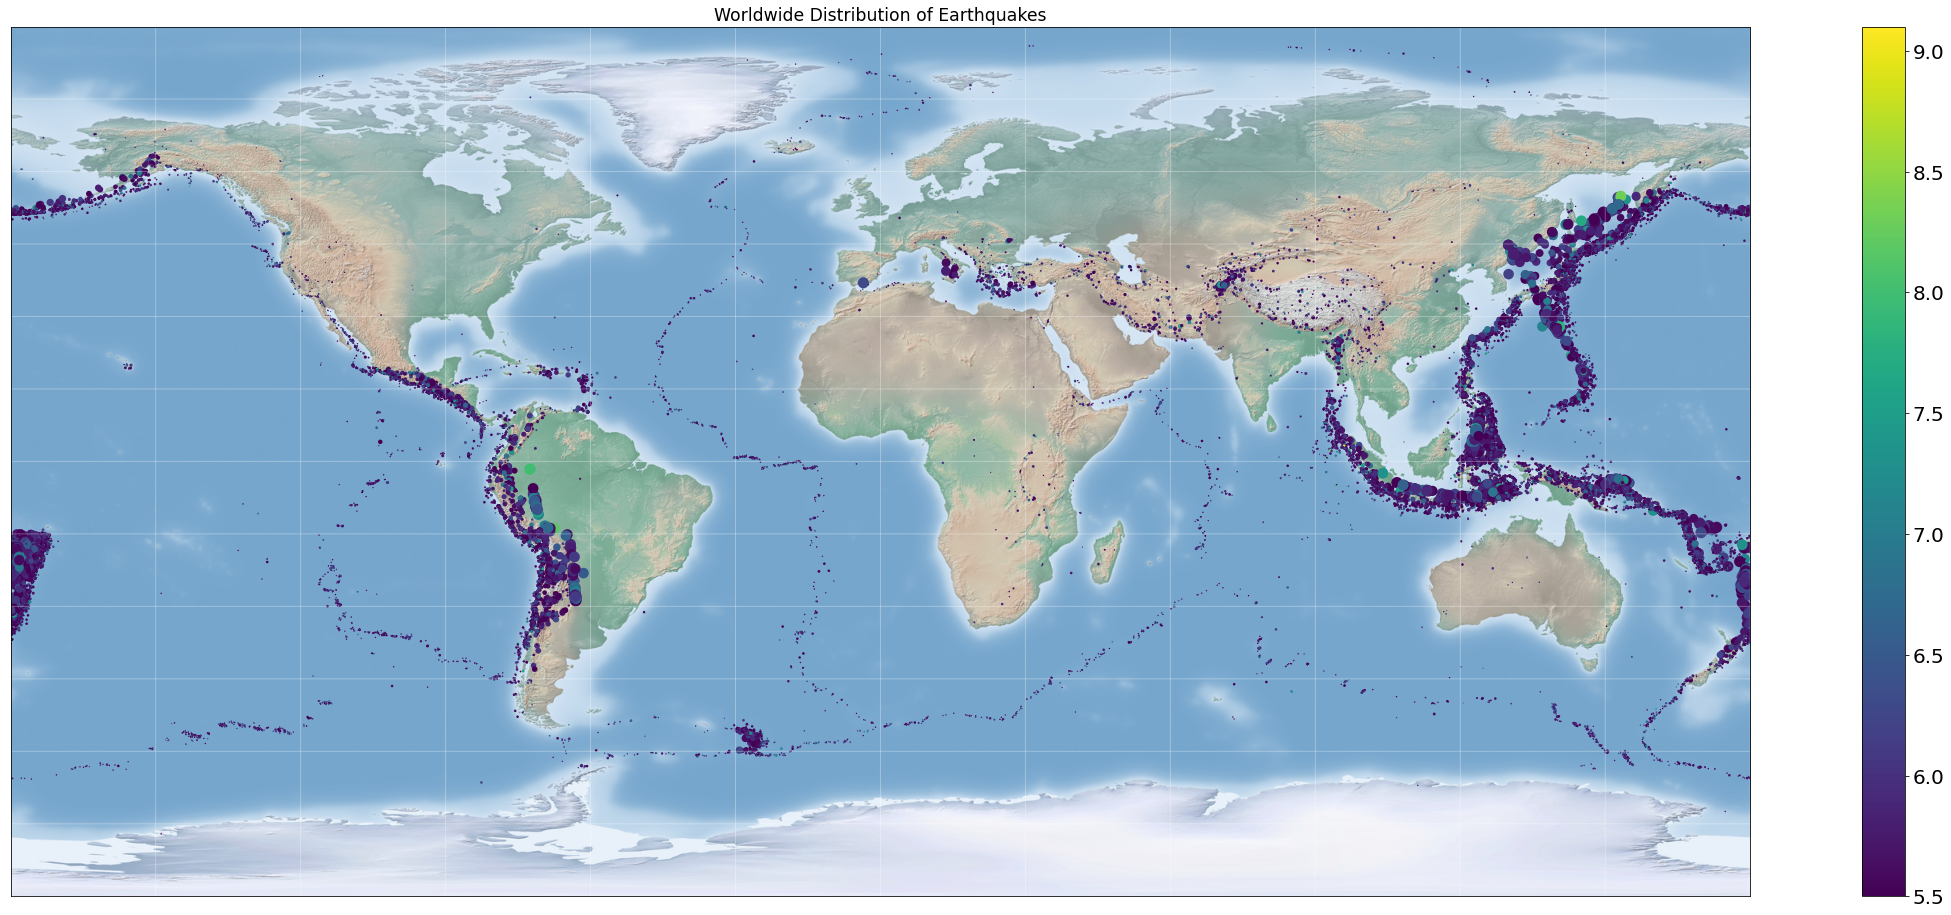

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd 
from itertools import chain

def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

df = pd.read_csv('database.csv')

fig = plt.figure(figsize = (40, 16))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

draw_map(m)

m.scatter(df['Longitude'].values, 
		  df['Latitude'].values,
		  latlon = True,
		  c = [magn for magn in df['Magnitude']],
		  s = [depth/5 for depth in df['Depth']],
		  cmap = 'viridis',
		  edgecolors = 'none')

cbar= plt.colorbar()
cbar.ax.tick_params(labelsize=20) 

plt.title('Worldwide Distribution of Earthquakes',fontsize='xx-large')
plt.savefig('eq_dis.png')
plt.show()

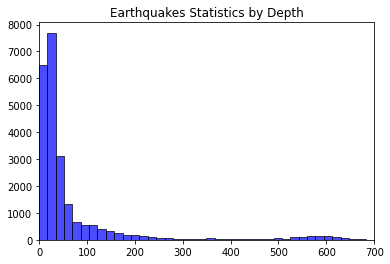

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')
data = np.array([float(depth) for depth in df['Depth']])

plt.hist(data, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlim(0,700)

plt.title("Earthquakes Statistics by Depth")
plt.savefig('eq_depth.png')
plt.show()

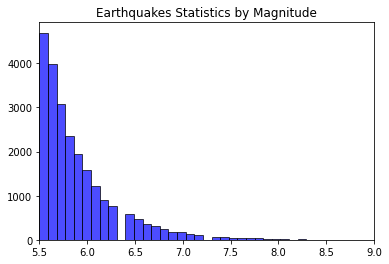

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')
data = np.array([float(magn) for magn in df['Magnitude']])

plt.hist(data, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlim(5.5,9.0)

plt.title("Earthquakes Statistics by Magnitude")
plt.savefig('eq_magn.png')
plt.show()

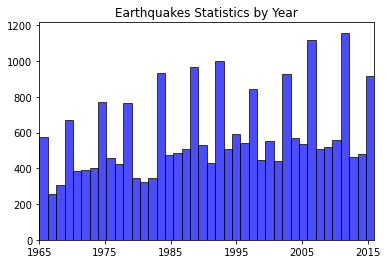

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')
data = np.array([int(date[-4:]) if date[-1]!='Z' else int(date[:4]) for date in df['Date']])

plt.hist(data, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlim(1965,2016)
plt.xticks(np.arange(1965,2017,10))

plt.title("Earthquakes Statistics by Year")
plt.savefig('eq_years.png')
plt.show()

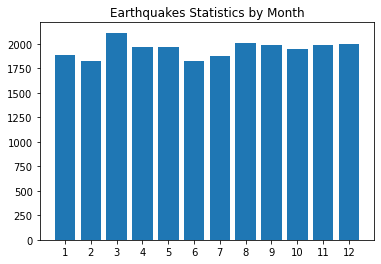

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')

cnt=[0]*12
for t in df['Date']:
  if t[-1]=='Z':
    cnt[int(t[5:7])-1]=cnt[int(t[5:7])-1]+1
  else:
    month, day, year = t.split('/')
    cnt[int(month)-1]=cnt[int(month)-1]+1

plt.bar(range(1,13), cnt)
plt.xticks(np.arange(1,13,1))

plt.title("Earthquakes Statistics by Month")
plt.savefig('eq_month.png')
plt.show()

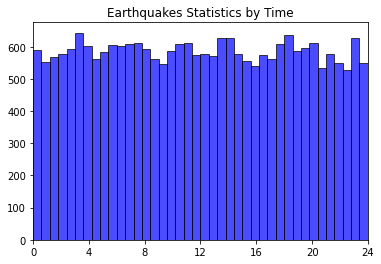

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')

data=[]
for t in df['Time']:
  if t[-1]=='Z':
    t=t[-13:-5]
  hour, minute, second = t.split(':')
  data.append((float(hour)*3600.0+float(minute)*60.0+float(second))/3600.0)

data=np.array(data)

plt.hist(data, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlim(0, 24)
plt.xticks(np.arange(0,25,4))

plt.title("Earthquakes Statistics by Time")
plt.savefig('eq_time.png')
plt.show()

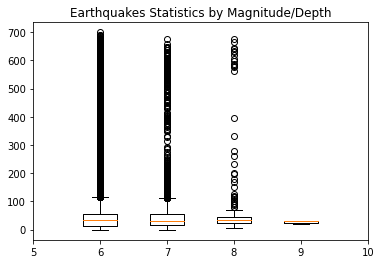

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')

data=[[] for i in range(11)]

for row in df.iterrows():
  row=row[1]
  data[int(float(row['Magnitude'])+0.5)-1].append(float(row['Depth']))
ax = plt.subplot()
ax.boxplot(data)
plt.xlim(5,10)
plt.title("Earthquakes Statistics by Magnitude/Depth")
plt.savefig('eq_magn_depth.png')
plt.show()

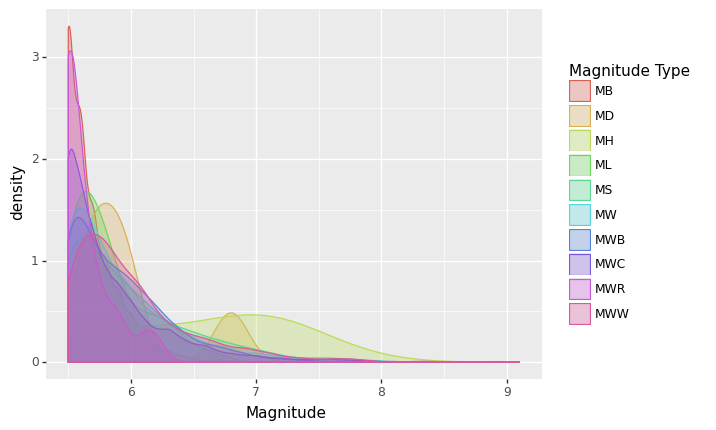

<ggplot: (-9223363299398415342)>

In [38]:
from plotnine import *
import pandas as pd
import numpy as np

df = pd.read_csv('database.csv')
df['Magnitude'].astype(float)
data = df[['Magnitude','Magnitude Type']]
data = data.dropna(axis=0, how='any')


ggplot(data=data, mapping = aes(x =  'Magnitude', color = 'Magnitude Type', fill='Magnitude Type')) + geom_density(alpha=0.3)
# fig.save('type.png')

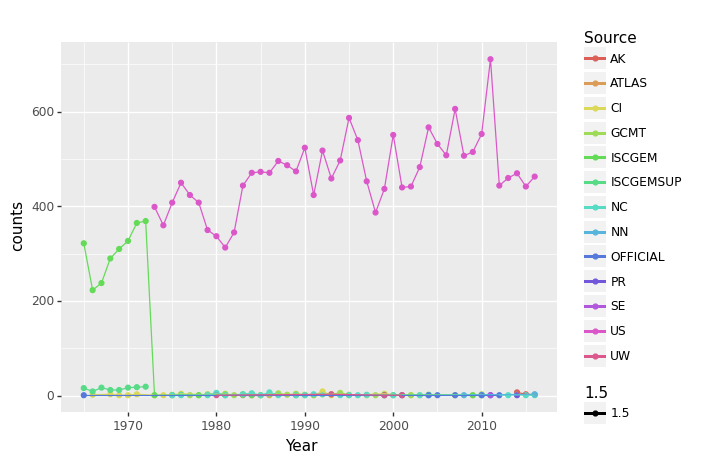

<ggplot: (8737422485880)>

In [39]:
from plotnine import *
import pandas as pd
import numpy as np

df = pd.read_csv('database.csv')
Year = [int(date[-4:]) if date[-1]!='Z' else int(date[:4]) for date in df['Date']]
df['Year']=Year
data=df.groupby(['Year', 'Source']).size().reset_index(name='counts')

ggplot(data=data, mapping = aes(x =  'Year', y='counts', fill='Source',color='Source',alpha=1.5)) + geom_point()  + geom_line()         
# fig.save('source.png')

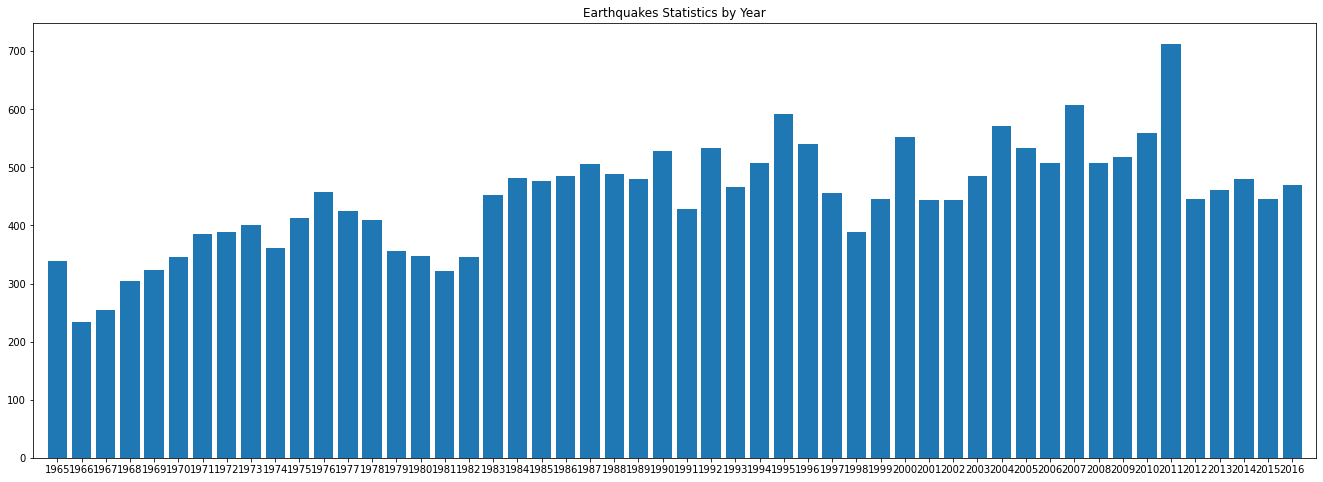

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

df = pd.read_csv('database.csv')

cnt=[0]*52
for t in df['Date']:
  year=-1965
  if t[-1]=='Z':
    year=year+int(t[:4])
  else:
    year=year+int(t[-4:])
  cnt[year]=cnt[year]+1

plt.figure(figsize=(23,8))
plt.bar(x=range(1965,2017), height=cnt)
plt.xticks(np.arange(1965,2017,1))
plt.xlim(1964, 2017)

plt.title("Earthquakes Statistics by Year")
plt.savefig('eq_year.png')
plt.show()

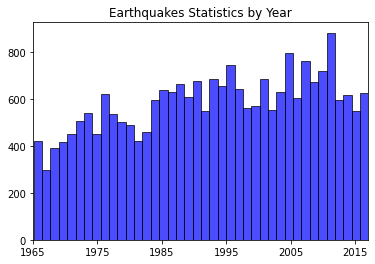

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

sum=[0]
def calcday(month,day,year):
  month=int(month)
  day=int(day)
  year=int(year)
  result=0.0
  if year%4==0 and (year%100!=0 or year%400==0) and month>2:
    if month>2:
      result=year+(sum[month]+day+1)/366.0
    else:
      result=year+(sum[month]+day)/366.0
  else:
    result=year+(sum[month]+day)/365.0
  return result

days=[31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(12):
  sum.append(sum[i]+days[i])
df = pd.read_csv('database.csv')
data=[]
for t in df['Date']:
  if t[-1]=='Z':
    month, day, year = t[5:7],t[8:10],t[:4]
  else:
    month, day, year = t.split('/')
  data.append(calcday(month,day,year))
data = np.array(data)

plt.hist(data, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlim(1965,2017)
plt.xticks(np.arange(1965,2017,10))

plt.title("Earthquakes Statistics by Year")
plt.savefig('eq_years.png')
plt.show()